# Project: Exploring Ford Go-Bike Data
Vikram Tharakan

## Table of Contents
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#GatheringData">Gathering Data</a></li>
<li><a href="#ExploringData">Exploring the Data</a></li>
<li><a href="#Explanatory">Explanatory Visualization</a></li>
<li><a href="#Conclusion">Conclusion</a></li>
</ul>

<a id='Intro'></a>
# Introduction

> In this notebook we will be analyzing data pulled straight from Ford GoBikes website. This data contains information about recorded trips over the past 2 years, and my goal is to investigate the data and then produce visuals that convey the trends I find in a clear and effective way. These summarizing visuals can be found in the explanatory visualization section of this notebook

<a id='GatheringData'></a>
# Gathering Data

> First we have to gather all the information in one centralized location to begin our analysis. The data on Ford GoBike's website appears to be stored in zipfiles all organized by month, expect for months in the year of 2017, which are stored in one, unnzipped csv file. I chose to read in these zipfiles, unzip the data, and then store all the csv files together in one giant csv file which I have called `all_bike_data.csv`. We then can begin analysis on this centralized dataset, by reading this into a pandas datafram


<a id='ExploringData'></a>
# Exploring the Data

> Now I can begin exploring the data. To start off with lets just look at the data in the `df2017` dataframe, to look at simple relationships. If I see something that I want to investigate further, I can look at then go back and look at these relationships using the larger `df` dataset. Visuals created in this section were meant for exploratory purposes only, and thus are not polished

<a id='Explanatory'></a>
# Explanatory Visualization

> In this section I will pose questions, follow them up with just a graph or visual solution that portrays the answer to the associated question in a clear and effective way. For all of these plots I have chosen to ignore the `other` category because there isn't much information contained in this categrory and for my visualizations it is largely just cluttering up the plot

##### What is the gender breakdown of Users from the data?
We can see the gender breakdown of our users using a simple bar chart plot of our data. We find that GoBike users are predominantly male, with 69.2% of all users registering as male, while only 22.6% registered as female. There was also a small percentage that identified as 'Other' and many users that did not put down their gender. Out of only the users that filled out their gender information, 74% were men, 24% were women, and 2% identified as other.

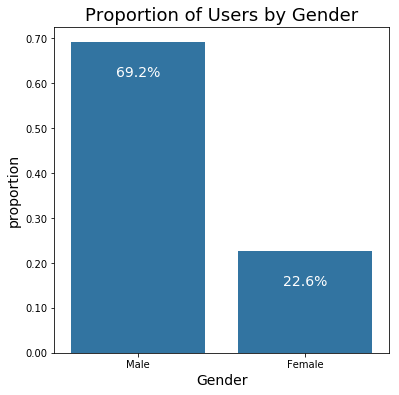

In [351]:
plt.figure(figsize=(6,6))
base_color = sb.color_palette()[0]

# Will be used to plot relative frequency
n_points = df.shape[0]
max_count = df['member_gender'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop+.1, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

sb.countplot(data = df, x = 'member_gender', color = base_color, order = ['Male', 'Female'])
plt.yticks(tick_props * n_points, tick_names);
plt.ylabel('proportion', size = 14);
plt.xlabel('Gender', size = 14);
plt.title('Proportion of Users by Gender', size = 18);

# add annotations
cat_counts_gender = df['member_gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts_gender[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-250000, pct_string, ha = 'center', color = 'w', size =14)
    
    

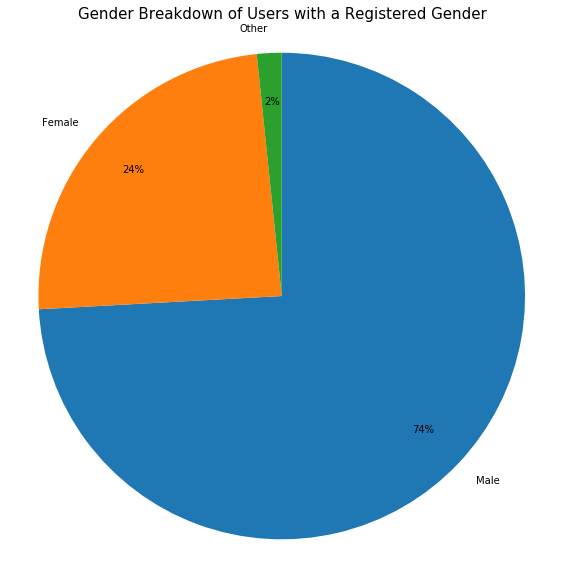

In [396]:
sorted_counts = df['member_gender'].value_counts()
plt.figure(figsize = (20,10))
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.0f%%', pctdistance=.8);
plt.axis('square');
plt.title('Gender Breakdown of Users with a Registered Gender',fontsize=15);

##### What does the member vs. customer breakdown looklike?
Here we want to look at how many of the users are subscribers vs how many use the app as simply a customer. Once again a simple bar chart will suffice, and I also broke down the membership by gender to see any trends there. 84.4% of the users are subscribers while only 15.6% of the users are customers. The ratio of customers to subscribers is also much higher for females than it is for males

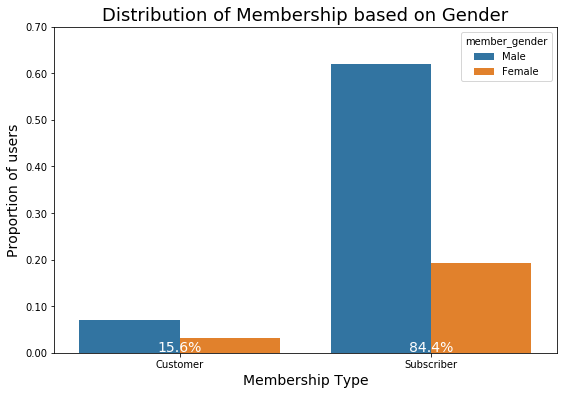

In [352]:
plt.figure(figsize=(9,6));
sb.countplot(data = df, x = 'user_type', hue = 'member_gender', hue_order = ['Male', 'Female']);
plt.xlabel('Membership Type', size = 14);
plt.ylabel('Proportion of users', size = 14);
plt.title('Distribution of Membership based on Gender', size = 18);
plt.yticks(tick_props * n_points, tick_names);

# add annotations
cat_counts_user = df['user_type'].value_counts()
locs1, labels1 = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs1, labels1):

    # get the text property for the label to get the correct count
    count = cat_counts_user[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, 10000, pct_string, ha = 'center', color = 'w', size =14)

##### What is the most common distance traveled per trip? (include gender/member breakdown in graph)
We can see how far the average user goes on a ride by plotting a histogram of the data. We also broke this down by gender and membership type to see if these factors had any effect on the distance traveled. In the end the most common trip length is about 0.5 to 0.6 miles and this did not vary based off of gender. However, for customers, the most common ride involved returning the bike to the same location, thus giving an effective total distance traveled of 0.0 miles.

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


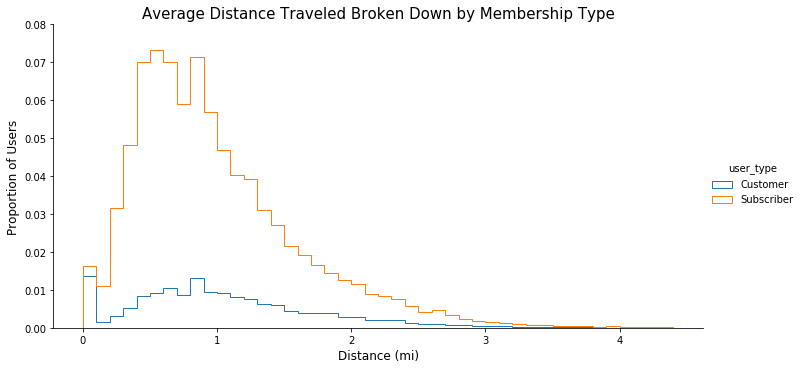

In [366]:
# Will be used to plot relative frequency
n_points = df.shape[0]
max_count = df[(df['distance'] < .6) & (df['distance'] >= .5)]['user_type'].value_counts().max() #Found from determining which bucket gives us the max
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop+.01, 0.01)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# Plotting DIstance Traveled against Membership Type
bin_edges = np.arange(0, 4.5, .1)
g = sb.FacetGrid(data = df, hue = 'user_type', size = 5, aspect = 2);
g.map(plt.hist, "distance", bins = bin_edges, histtype = 'step');
g.add_legend();
plt.title('Average Distance Traveled Broken Down by Membership Type', size = 15);
plt.xlabel('Distance (mi)', size = 12);
plt.ylabel('Proportion of Users', size = 12);
plt.yticks(tick_props * n_points, tick_names);



/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


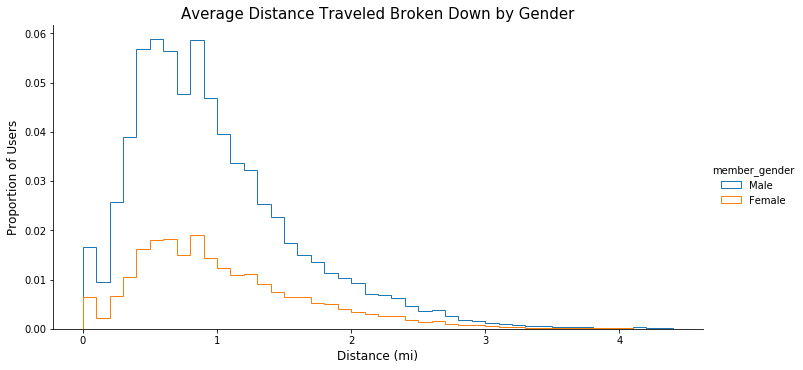

In [367]:
# Will be used to plot relative frequency
n_points = df.shape[0]
max_count = df[(df['distance'] < .6) & (df['distance'] >= .5)]['member_gender'].value_counts().max() #Found from determining which bucket gives us the max
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop+.01, 0.01)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# Plotting DIstance Traveled against Membership Type
bin_edges = np.arange(0, 4.5, .1)
g = sb.FacetGrid(data = df, hue = 'member_gender', size = 5, aspect = 2, hue_order = ['Male','Female']);
g.map(plt.hist, "distance", bins = bin_edges, histtype = 'step');
g.add_legend();
plt.title('Average Distance Traveled Broken Down by Gender', size = 15);
plt.xlabel('Distance (mi)', size = 12);
plt.ylabel('Proportion of Users', size = 12);
plt.yticks(tick_props * n_points, tick_names);

##### What about the average duration of a trip? (include gender/member breakdown in graph)
Because a large share of users that are customers returned their bike to the same location, this skews up our average distance traveled statistic. Instead, let's look at the average duration of a trip, as this will avoid the 0 displacement problem. Upon plotting the data in a similar way as the distance plots, we see that the most common ride duration falls between about 5-10 minutes regardless of the gender or membership type for the user

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


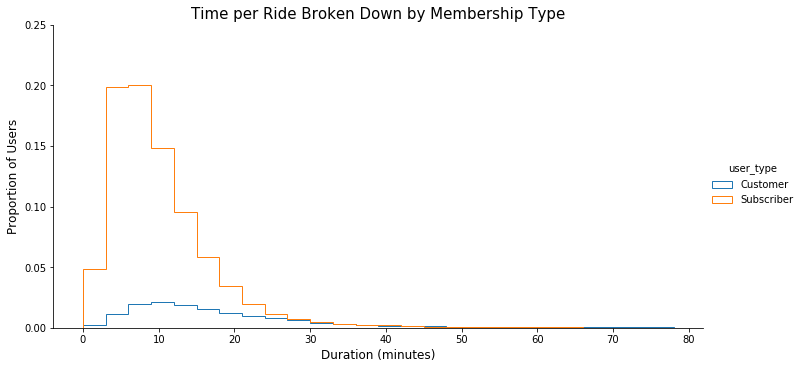

In [371]:
# Will be used to plot relative frequency
n_points = df_2.shape[0]
max_count = df_2[(df_2['duration_min'] < 9) & (df_2['duration_min'] >= 6)]['user_type'].value_counts().max() #Found from determining which bucket gives us the max
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop+.05, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# Plotting DIstance Traveled against Membership Type
bin_edges = np.arange(0, 80, 3)
g = sb.FacetGrid(data = df_2, hue = 'user_type', size = 5, aspect = 2);
g.map(plt.hist, "duration_min", bins = bin_edges, histtype = 'step');
g.add_legend();
plt.title('Time per Ride Broken Down by Membership Type', size = 15);
plt.xlabel('Duration (minutes)', size = 12);
plt.ylabel('Proportion of Users', size = 12);
plt.yticks(tick_props * n_points, tick_names);

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


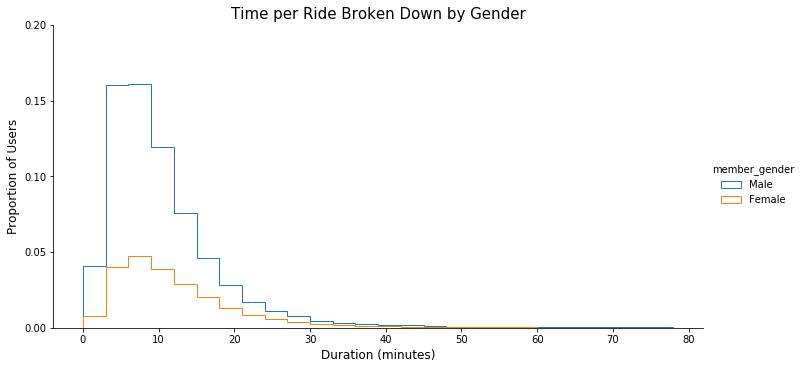

In [372]:
# Will be used to plot relative frequency
n_points = df_2.shape[0]
max_count = df_2[(df_2['duration_min'] < 9) & (df_2['duration_min'] >= 6)]['member_gender'].value_counts().max() #Found from determining which bucket gives us the max
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop+.05, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# Plotting DIstance Traveled against Membership Type
bin_edges = np.arange(0, 80, 3)
g = sb.FacetGrid(data = df_2, hue = 'member_gender', size = 5, aspect = 2, hue_order = ['Male', 'Female']);
g.map(plt.hist, "duration_min", bins = bin_edges, histtype = 'step');
g.add_legend();
plt.title('Time per Ride Broken Down by Gender', size = 15);
plt.xlabel('Duration (minutes)', size = 12);
plt.ylabel('Proportion of Users', size = 12);
plt.yticks(tick_props * n_points, tick_names);

##### What does the age breakdown of our users look like? Does age effect whether or not they are a member/how far a user is willing to travel?
In order to get a read on this, I binned all the users with a registered age into an age category, each separated by a decade (<20 years old, between 20-30 years old, between 30-40 years old, etc). Then I simply tallied up the total counts for these stats and plotted the results in a bar chart. 

I then went on to see if this age range affected distance traveled but there was not much difference in this between the age groups. The results are shown as a clustered box plot, and you can see that most age ranges have approximately the same median distance traveled per ride. However, users in the 30s seem to travel slightly further on average compared to the other age roups.

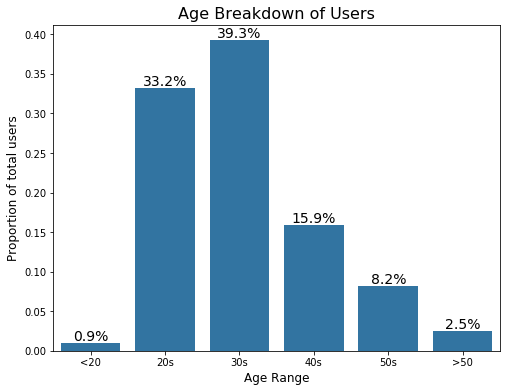

In [380]:
# Will be used to plot relative frequency
n_points = df_age.shape[0]
max_count = df_age['age_bins'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop+.05, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]


base_color = sb.color_palette()[0]
cat_order = ['<20', '20s', '30s', '40s', '50s', '>50']
plt.figure(figsize = (8,6))
sb.countplot(data = df_age, x = 'age_bins', color = base_color, order = cat_order);

plt.yticks(tick_props * n_points, tick_names);
plt.title('Age Breakdown of Users', size = 16);
plt.xlabel('Age Range', size = 12);
plt.ylabel('Proportion of total users', size = 12);

# add annotations
cat_counts_age = df_age['age_bins'].value_counts()
locs_age, labels_age = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs_age, labels_age):

    # get the text property for the label to get the correct count
    count = cat_counts_age[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count+10000, pct_string, ha = 'center', color = 'black', size =14)
    

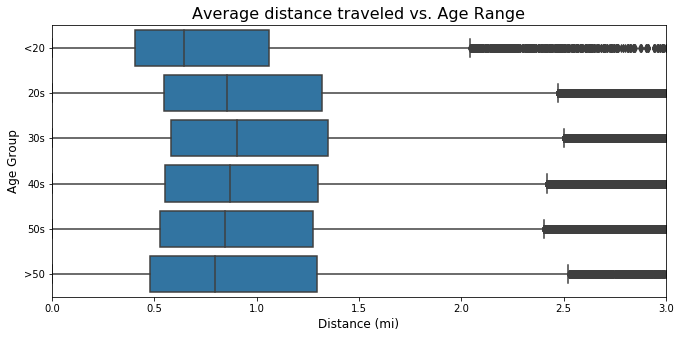

In [397]:
base_color = sb.color_palette()[0]
plt.figure(figsize = (11,5))
sb.boxplot(data = df_age, x = 'distance', y = 'age_bins', color = base_color, order = cat_order)
plt.axis(xmin = 0, xmax = 3);
plt.xlabel('Distance (mi)', size =12);
plt.ylabel('Age Group', size = 12);
plt.title('Average distance traveled vs. Age Range', size = 16);

##### What time of day do users most commly use the bikes?
To figure this out I plotted a histogram of the start time of each ride. It appears as though the result is bimodal, with the two peaks coming at either side of rush hour (around 9am and around 5-6pm)

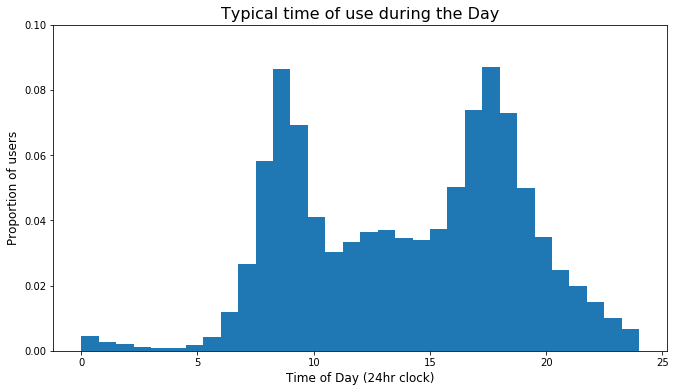

In [383]:
# Will be used to plot relative frequency
n_points = df.shape[0]
max_count = df[(df['time_of_day'] < 9) & (df['time_of_day'] >= 8.25)].shape[0]
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop+.02, .02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.figure(figsize = (11,6))
bin_edges = np.arange(0, df.time_of_day.max()+.75, .75)
plt.hist(data = df, x = 'time_of_day', bins = bin_edges)
plt.xlabel('Time of Day (24hr clock)',size = 12);
plt.ylabel('Proportion of users',size = 12);
plt.title('Typical time of use during the Day',size = 16);
plt.yticks(tick_props * n_points, tick_names);

##### Where do most of the journeys start/end from or is it more uniform? Does it differ by age/gender/membership?
To answer this question I plotted a heat map of longitude vs. latitude for all the rides in the data set. There appeared to be one central hotspot, located near the financial district and the Caltrain stop in San Francisco. There are many people that take Caltrain to work everyday, which further supports the idea that users use the GoBike as a commuting tool. 

Surprisingly the heat map that included every registered ride, regardless of age/gender/membership/or even whether it was starting or ending a trip, all looked very similar. Thus rather than show a cluttered plot, I will just show one map containing all the data, as it is pretty consistent across the board.

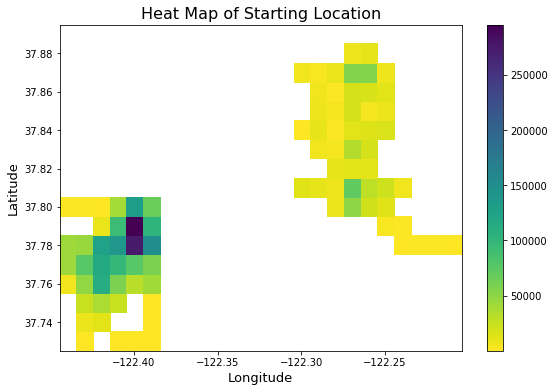

In [391]:
bins_y = np.arange(37.725, latmax+.02, .01)
bins_x = np.arange(lonmin, -122.20, .01)
plt.figure(figsize = (9,6));
plt.hist2d(data = df, y = 'start_station_latitude', x = 'start_station_longitude',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();
plt.ylabel('Latitude', size = 13);
plt.xlabel('Longitude', size = 13);
plt.title('Heat Map of Starting Location', size = 16);

##### How has the overall usage of bikes changed over time?
To answer this question I had to bin the start time data in a similar way to how I had to bin the data for ages. I chose to bin the data by month and then plot the results as a bar chart. The results showed that there has been an overall increase in the number of users by a factor of 5 between 7/17 and 4/19. I then separated the plot out by age group, and plotted the results in a line plot. This second graph shows that the age range with the biggest increase in number of were users in their 20's and 30's.

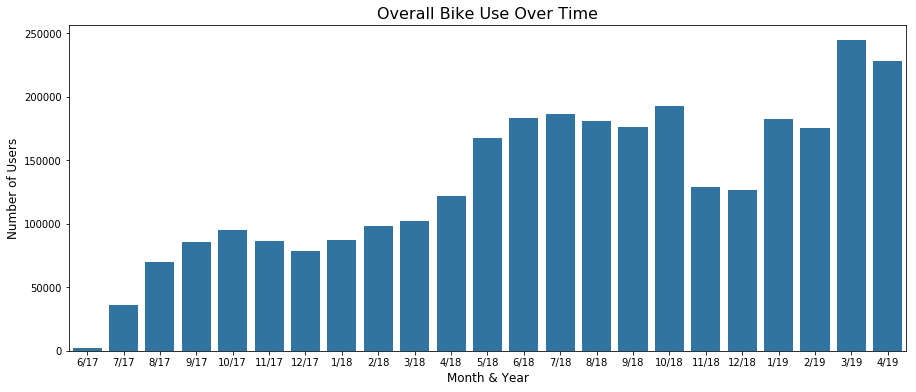

In [399]:
# Plot histogram of use time
plt.figure(figsize = (15,6))
time_order = ['6/17', '7/17', '8/17', '9/17', '10/17', '11/17', '12/17', '1/18', '2/18', '3/18', '4/18'
             , '5/18', '6/18', '7/18', '8/18', '9/18', '10/18', '11/18', '12/18', '1/19', '2/19'
             , '3/19', '4/19']
sb.countplot(data = df_age, x = 'time_bins', color = base_color, order = time_order);
plt.xlabel('Month & Year', size = 12);
plt.ylabel('Number of Users', size = 12)
plt.title('Overall Bike Use Over Time', size = 16);

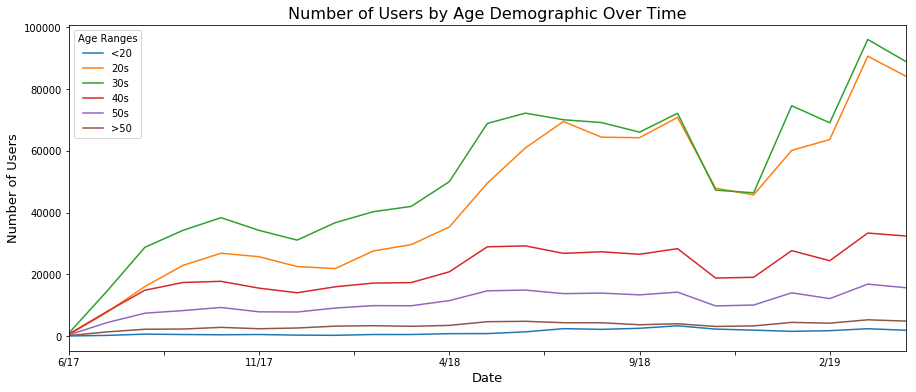

In [385]:
# Creating a new dataframe with groupedby results and plotting the trends over time
df_overtime = df_age.groupby('time_bins').age_bins.value_counts().unstack()
df_overtime = df_overtime.reindex(time_order)
df_overtime = df_overtime.reindex(columns=cat_order)
df_overtime.plot(figsize = (15,6));
plt.xlabel('Date', size = 13);
plt.ylabel('Number of Users', size = 13);
plt.title('Number of Users by Age Demographic Over Time', size = 16);
plt.legend(title = 'Age Ranges');

<a id='Conclusion'></a>
# Conclusion

Through this project we were able to explore Ford-Go-Bike Data over the last couple years and make visualizations to depict what we see through our exploratory analysis. The data first had to be stored in a central data frame, and this was relatively easy as all the information was in one location and the data was relatively clean to begin with. I then explored the data and looked for trends and saw if I could portray this information in a nice visual way

Some key points seen:

* 69.2% of the users are registered as males and 22.6% are registered as females. Clearly a male dominated app.
* 84.4% of the users are subscribers to the app while only 15.6% of users are customers
* Looking at the heat map and the peak time for rides during the day, we can infer that the Ford GoBike is used predominantly used by commuters. Most bike rides come around 9am and 6pm which are usual commuter times, and many rides start/end in the financial district of SF or the Caltrain stop, which adds more evidence to support the commuter claim
* Most of the users are in their 20s and 30s, with those age ranges occupying 33.2% and 39.3% of the users that input their age information
* The overall usage of bikes has gone up over the last 2 years, with over 5 times as many users in April 2019 compared to July of 2017. This increase in users largely comes from an increase in users in their 20s, 30s, and 40s. All other age demographics have maintained a relatively constant number of users per month over the last 2 years